In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm

In [27]:
raw_data= pd.read_csv('Final_raw_data.csv')

In [28]:
raw_data=raw_data.fillna(0)

In [29]:
raw_data2=pd.get_dummies(raw_data, columns=['gender', 'age_group', 'income_group', 'ethnicity', 'urbanicity'], drop_first=True)
raw_data2.columns

Index(['email_acq', 'time_bn_wm_and_home', 'time_bn_last_wm_and_home',
       'no_items_lt', 'auth_revenue_lt', 'no_divisions_lt', 'auth_qty_lt',
       'no_items_lt_edl', 'auth_revenue_lt_edl', 'no_super_depts_lt_edl',
       'auth_qty_lt_edl', 'avg_wm_order_gap', 'avg_ent_order_gap',
       'avg_enp_order_gap', 'avg_edl_order_gap', 'avg_fashion_order_gap',
       'aov_wm', 'ent_aov', 'enp_aov', 'edl_aov', 'fashion_aov',
       'first_order_wm_gmv', 'holiday_gmv', 'non_holiday_gmv', 'total_gmv',
       'avg_basket_value_delta', 'avg_basket_size_delta', 'no_home_visits',
       'no_wm_visits', 'no_home_pdp_visits', 'home_pdp_conversion_rate',
       'no_home_page_views', 'no_wm_page_views', 'no_divisions_per_order',
       'no_super_depts_per_order', 'no_depts_per_order',
       'top_brand_revenue_percent', 'avg_dwell_time', 'hh_adult_qty',
       'hh_children_qty', 'wm_pdp_visits', 'avg_basket_value_delta_flag',
       'Flag', 'gender_M', 'gender_OTHERS', 'gender_U', 'age_group_GENX',

In [30]:
raw_data2=raw_data2.drop(['email_acq'], axis=1)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(raw_data2.drop(['Flag'], axis=1), raw_data2['Flag'], test_size=0.3, random_state=0)

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logistic= LogisticRegression()
logistic.fit(x_train, y_train)
logistic_prediction= logistic.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test,logistic_prediction))
print("Accuracy:",metrics.accuracy_score(y_test, logistic_prediction))
metrics.confusion_matrix(y_test, logistic_prediction)

              precision    recall  f1-score   support

           0       0.77      0.99      0.86     85139
           1       0.57      0.06      0.10     27208

    accuracy                           0.76    112347
   macro avg       0.67      0.52      0.48    112347
weighted avg       0.72      0.76      0.68    112347

Accuracy: 0.7613109384318228


array([[84024,  1115],
       [25701,  1507]], dtype=int64)

# XG BOOST

In [34]:
from numpy import loadtxt
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [35]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [36]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.50%


In [37]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test,predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
metrics.confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.78      0.97      0.86     85139
           1       0.57      0.13      0.21     27208

    accuracy                           0.76    112347
   macro avg       0.67      0.55      0.53    112347
weighted avg       0.73      0.76      0.70    112347

Accuracy: 0.764951445076415


array([[82534,  2605],
       [23802,  3406]], dtype=int64)

In [38]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [39]:
from h2o.automl import H2OAutoML

In [40]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,1 day 16 hours 43 mins
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,1 month and 9 days
H2O cluster name:,H2O_from_python_praneeth_p_umnl3n
H2O cluster total nodes:,1
H2O cluster free memory:,830 Mb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [54]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(raw_data2, test_size=0.3, random_state=0)

In [55]:
train.to_csv (r'C:\Users\praneeth.p\Documents\Praneeth\NoteBooks\GITHUB\Tredence\LTR analysis\train1.csv', index = False, header=True)
test.to_csv (r'C:\Users\praneeth.p\Documents\Praneeth\NoteBooks\GITHUB\Tredence\LTR analysis\test1.csv', index = False, header=True)

In [56]:
train=h2o.import_file("train1.csv")
testh=h2o.import_file("test1.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [57]:
train['Flag']=train['Flag'].asfactor()
x=[train.drop(["Flag"], axis=1)]

In [51]:
aml=H2OAutoML(max_runtime_secs=3600)

In [60]:
x

time_bn_wm_and_home,time_bn_last_wm_and_home,no_items_lt,auth_revenue_lt,no_divisions_lt,auth_qty_lt,no_items_lt_edl,auth_revenue_lt_edl,no_super_depts_lt_edl,auth_qty_lt_edl,avg_wm_order_gap,avg_ent_order_gap,avg_enp_order_gap,avg_edl_order_gap,avg_fashion_order_gap,aov_wm,ent_aov,enp_aov,edl_aov,fashion_aov,first_order_wm_gmv,holiday_gmv,non_holiday_gmv,total_gmv,avg_basket_value_delta,avg_basket_size_delta,no_home_visits,no_wm_visits,no_home_pdp_visits,home_pdp_conversion_rate,no_home_page_views,no_wm_page_views,no_divisions_per_order,no_super_depts_per_order,no_depts_per_order,top_brand_revenue_percent,avg_dwell_time,hh_adult_qty,hh_children_qty,wm_pdp_visits,avg_basket_value_delta_flag,gender_M,gender_OTHERS,gender_U,age_group_GENX,age_group_GENZ,age_group_MILLENNIALS,age_group_OTHERS,age_group_SENIORS,income_group_LOW,income_group_MEDIUM,income_group_OTHERS,ethnicity_ASIANS,ethnicity_CAUCASIANS,ethnicity_HISPANICS,ethnicity_OTHERS,ethnicity_UNKNOWN,urbanicity_RURAL,urbanicity_SEMI URBAN,urbanicity_URBAN
5.9,5.9,6,44.41,1,6,6,44.41,2,6,1.23333,0,0,1.23333,0,40.8125,0,0,40.8125,0,44.41,39.95,123.3,163.25,1.48667,0,1,2,1,1,11.5,67,1,1.75,2.75,0,630,2,2,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1.86667,1.86667,1,57.43,1,1,0,0,0,0,1.63333,0,0,0,0,56.965,0,0,0,0,57.43,0,227.86,227.86,0.31,0,1,1,1,0.563322,1,1,1,1,1,0,2017.89,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
26.9667,7.83333,2,23.98,1,2,0,0,0,0,0,0,0,0,0,23.98,0,0,0,23.98,73.99,0,23.98,23.98,0,0,2,3,2,0.5,4.66667,17.6667,1,2,2,0,267.333,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
18.8,2.9,3,50.93,1,3,0,0,0,0,0,0,0,0,0,50.93,50.93,0,0,0,93.74,50.93,0,50.93,0,0,3,4,2,0,10.75,123,1,2,3,0,852.5,2,1,3,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4.33333,4.33333,1,12.48,1,1,0,0,0,0,0,0,0,0,0,12.48,12.48,0,0,0,12.48,12.48,0,12.48,0,0,1,1,1,0.563322,1,1,1,1,1,0,2017.89,2,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
71.4,0.5,3,41.37,2,3,6,36.41,2,7,0.366667,0,0,0,0,38.89,21.87,0,36.41,19.5,4.47,0,77.78,77.78,0,0,1,3,1,1,5.33333,52.3333,1.5,2,2.5,0.0777651,822.333,4,2,3,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
79.2667,5.46667,2,42.9,2,3,1,19.98,1,2,0,0,0,0,0,42.9,0,0,19.98,22.92,219,0,42.9,42.9,0,0,3,10,3,0.333333,6.8,67.2,2,2,2,0.534266,1327.2,2,0,9,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
20.3667,9.16667,1,23.5,1,1,0,0,0,0,4,0,4,0,0,35.2467,17.97,23.2667,0,0,99.95,0,105.74,105.74,-8.81,-0.5,3,4,3,0.333333,3.25,58.25,1.66667,1.66667,1.66667,0,2241,0,0,3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
28.5333,3.9,1,39.99,1,1,0,0,0,0,0,0,0,0,0,39.99,39.99,0,0,0,22.47,39.99,0,39.99,0,0,3,10,3,0.333333,2.5,25.4,1,1,1,0,1451.1,3,3,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
62.9667,10.5333,2,163.31,1,2,2,163.31,1,2,10.3333,5.33333,0,2.33333,4.16667,34.5209,17.3317,0,100.59,24.1867,168.5,155.97,223.76,379.73,14.643,0,1,1,1,0.563322,1,1,1.09091,1.18182,1.27273,0.0866902,2017.89,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


[]

In [61]:
aml.train(y="Flag", training_frame=train)

AutoML progress: |
16:29:01.80: AutoML: XGBoost is not available; skipping it.

███████Failed polling AutoML progress log: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\praneeth.p\\AppData\\Local\\Temp\\tmpsindryp6.csv'
███████████████████Failed polling AutoML progress log: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\praneeth.p\\AppData\\Local\\Temp\\tmpm0pc_4cb.csv'
███Failed polling AutoML progress log: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\praneeth.p\\AppData\\Local\\Temp\\tmpib8v1rdq.csv'
█████████████████████████Failed polling AutoML progress log: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\praneeth.p\\AppData\\Local\\Temp\\tmplje4o1h6.csv'
██| 100%


In [62]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200315_162901,0.668117,0.517104,0.41157,0.380936,0.411265,0.169139
GBM_2_AutoML_20200315_162901,0.666279,0.517143,0.408305,0.383011,0.411369,0.169225
StackedEnsemble_BestOfFamily_AutoML_20200315_162901,0.666222,0.517855,0.408906,0.382092,0.411619,0.16943
GBM_1_AutoML_20200315_162901,0.66598,0.517219,0.408814,0.381724,0.411379,0.169233
GBM_3_AutoML_20200315_162901,0.664851,0.517723,0.406662,0.382129,0.411645,0.169452
GBM_grid__1_AutoML_20200315_162901_model_1,0.664157,0.518254,0.406613,0.38423,0.411847,0.169618
GBM_4_AutoML_20200315_162901,0.662028,0.519209,0.401785,0.387176,0.412398,0.170072
GBM_5_AutoML_20200315_162901,0.661447,0.518877,0.404127,0.386889,0.412148,0.169866
GBM_grid__1_AutoML_20200315_162901_model_2,0.660542,0.524064,0.404011,0.386483,0.414574,0.171872
DRF_1_AutoML_20200315_162901,0.652443,0.522519,0.392094,0.393475,0.413868,0.171287


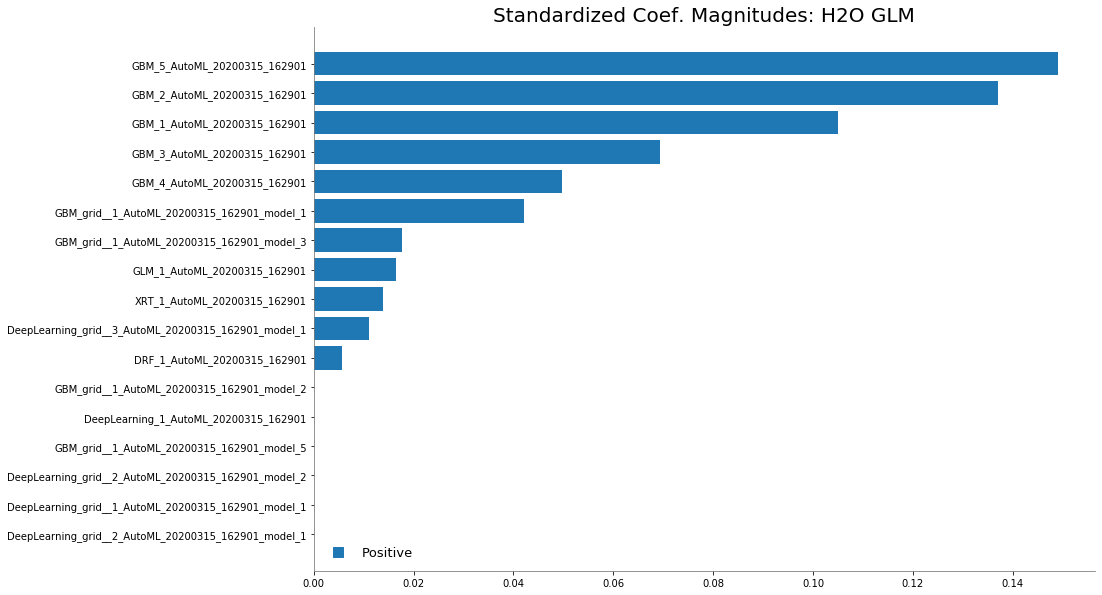

In [63]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])
%matplotlib inline
metalearner.std_coef_plot()

In [66]:
pred=aml.predict(testh)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [67]:
pred

predict,p0,p1
1,0.250885,0.749115
1,0.555824,0.444176
0,0.862189,0.137811
0,0.805707,0.194293
0,0.859281,0.140719
0,0.82472,0.17528
1,0.536896,0.463104
1,0.781141,0.218859
1,0.760583,0.239417
1,0.782927,0.217073
